# Temporal Dynamics

In [1]:
library(tidyr)
library(dplyr)
library(lme4)
library(sjPlot)
library(ggplot2)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### reading and processing time data

In [2]:
data = read.table('data/analyse_clean.csv', h=T, sep = ',')
dates = read.table('data/images_dates.csv', h=T, sep = ',')

In [3]:
head(dates)
head(data)

year month day hour min session spot image_name seconds
1 2020 10    5   19   58  BM2     1BM2 P1760001   47     
2 2020 10    5   19   59  BM2     1BM2 P1760002   17     
3 2020 10    5   19   59  BM2     1BM2 P1760003   47     
4 2020 10    5   20    0  BM2     1BM2 P1760004   17     
5 2020 10    5   20    0  BM2     1BM2 P1760005   47     
6 2020 10    5   20    1  BM2     1BM2 P1760006   17

session image   obj_class species    abundance_max nb_img contact_pseudo
1 1PE4    1840115 ant       solenopsis 2              2     0             
2 1PE4    1840283 ant       solenopsis 1              1     0             
3 1PE4    1840432 cockroach msp1       1              1     0             
4 1PE4    1840459 ant       solenopsis 1              2     0             
5 1PE4    1840463 ant       solenopsis 1              5     0             
6 1PE4    1840641 cockroach msp2       1             50     1             
  contact_egg contact_char predation
1 1           0            1        
2 0           0            0        
3 0           0            0        
4 1           0            1        
5 0           0            1        
6 0           0            0

In [4]:
data$image_name = sub("^", "P", data$image)
data= data%>%
rename(spot=session)
head(data)

spot image   obj_class species    abundance_max nb_img contact_pseudo
1 1PE4 1840115 ant       solenopsis 2              2     0             
2 1PE4 1840283 ant       solenopsis 1              1     0             
3 1PE4 1840432 cockroach msp1       1              1     0             
4 1PE4 1840459 ant       solenopsis 1              2     0             
5 1PE4 1840463 ant       solenopsis 1              5     0             
6 1PE4 1840641 cockroach msp2       1             50     1             
  contact_egg contact_char predation image_name
1 1           0            1         P1840115  
2 0           0            0         P1840283  
3 0           0            0         P1840432  
4 1           0            1         P1840459  
5 0           0            1         P1840463  
6 0           0            0         P1840641

In [5]:
data = inner_join(data,dates)
head(data)

Joining, by = c("spot", "image_name")



spot image   obj_class species    abundance_max nb_img contact_pseudo
1 1PE4 1840115 ant       solenopsis 2              2     0             
2 1PE4 1840283 ant       solenopsis 1              1     0             
3 1PE4 1840432 cockroach msp1       1              1     0             
4 1PE4 1840459 ant       solenopsis 1              2     0             
5 1PE4 1840463 ant       solenopsis 1              5     0             
6 1PE4 1840641 cockroach msp2       1             50     1             
  contact_egg contact_char predation image_name year month day hour min session
1 1           0            1         P1840115   2020 10    26  18   18  PE4    
2 0           0            0         P1840283   2020 10    26  19   42  PE4    
3 0           0            0         P1840432   2020 10    26  20   56  PE4    
4 1           0            1         P1840459   2020 10    26  21   10  PE4    
5 0           0            1         P1840463   2020 10    26  21   12  PE4    
6 0           0            0         P1840641   2020 10    26  22   41  PE4    
  seconds
1  8     
2  8     
3 38     
4  8     
5  8     
6  8

In [6]:
data = data %>%
mutate(duration = (nb_img/2)*60)

In [7]:
data=data %>%
  mutate(date = make_datetime(year, month, day, hour, min, seconds))

In [8]:
data = data%>%
mutate(end_date = date + duration)

In [9]:
library(scales)

In [10]:
data$timestamp <- as.POSIXct(strptime(data$date, "%Y-%m-%d %H:%M:%S",  tz = "UTC"))

In [11]:
data$timestamp

  [1] "2020-10-26 18:18:08 UTC" "2020-10-26 19:42:08 UTC"
  [3] "2020-10-26 20:56:38 UTC" "2020-10-26 21:10:08 UTC"
  [5] "2020-10-26 21:12:08 UTC" "2020-10-26 22:41:08 UTC"
  [7] "2020-10-26 23:19:08 UTC" "2020-10-26 23:21:38 UTC"
  [9] "2020-10-26 23:58:08 UTC" "2020-10-26 23:58:38 UTC"
 [11] "2020-10-27 00:18:38 UTC" "2020-10-27 00:31:38 UTC"
 [13] "2020-10-27 00:32:08 UTC" "2020-10-27 00:32:08 UTC"
 [15] "2020-10-27 00:55:08 UTC" "2020-10-27 01:00:08 UTC"
 [17] "2020-10-27 01:02:08 UTC" "2020-10-27 01:53:08 UTC"
 [19] "2020-10-27 02:07:08 UTC" "2020-10-27 02:23:38 UTC"
 [21] "2020-10-27 02:23:38 UTC" "2020-10-27 02:28:08 UTC"
 [23] "2020-10-27 03:38:08 UTC" "2020-10-27 04:35:38 UTC"
 [25] "2020-10-27 05:02:38 UTC" "2020-10-27 05:35:08 UTC"
 [27] "2020-10-27 06:44:08 UTC" "2020-10-27 06:44:08 UTC"
 [29] "2020-10-27 14:04:38 UTC" "2020-09-17 16:09:52 UTC"
 [31] "2020-09-17 18:09:52 UTC" "2020-09-17 20:53:22 UTC"
 [33] "2020-09-18 07:09:52 UTC" "2020-09-18 11:34:52 UTC"
 [35] "2020-10

In [12]:
library(hms)
data$time <- hms::hms(second(data$timestamp), minute(data$timestamp), hour(data$timestamp))
data$time <- as.POSIXct(data$time)
# write.csv(data, 'data_dates_clean.csv',row.names=FALSE)


Attaching package: ‘hms’


The following object is masked from ‘package:lubridate’:

    hms




### Plots

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



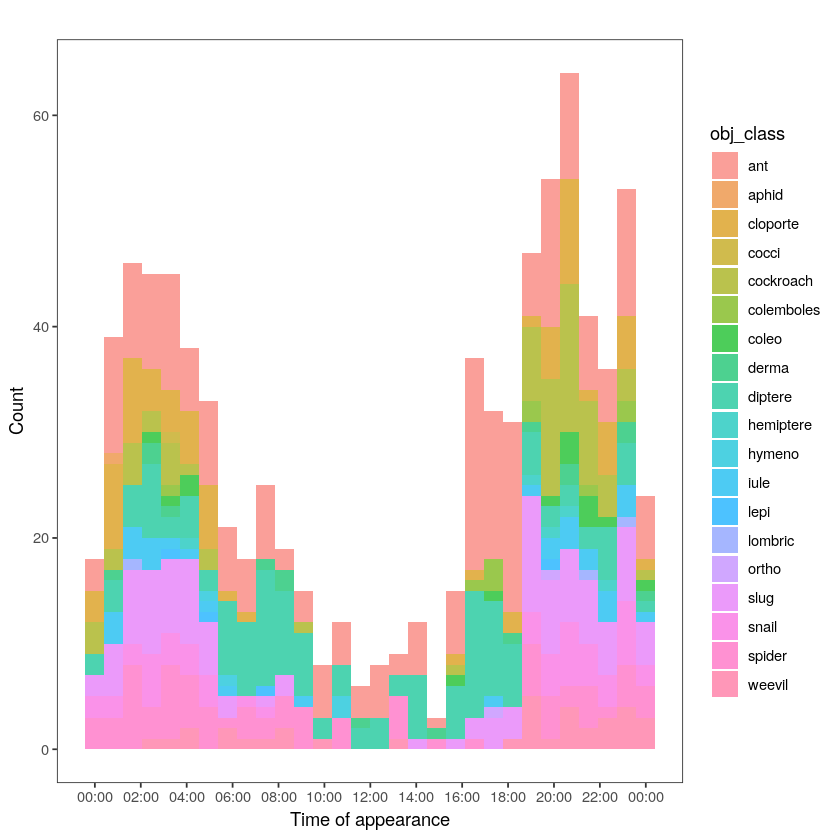

In [13]:
# first visualisation as barplot

ggplot(data, aes(time, fill=obj_class)) + 
  geom_histogram(alpha = 0.7) + #also play with adjust such as adjust = 0.5
  scale_x_datetime(breaks = date_breaks("2 hours"), labels=date_format("%H:%M"))+
theme_bw()+theme(panel.grid.major = element_blank(),panel.grid.minor = element_blank())+
labs(title="", x ="Time of appearance", y = "Count")

# ggsave('time_total.png')

In [14]:
tz = "UTC"

df <- data %>%
  mutate( hour_start = as.numeric(hour(date)),
          hour_end_est = as.numeric(hour(end_date)),
          hour_end = ifelse(hour_end_est >= hour_start, 
                            hour_end_est,
                            hour_start)
  ) 

df

spot image   obj_class species    abundance_max nb_img contact_pseudo
1   1PE4 1840115 ant       solenopsis 2               2    0             
2   1PE4 1840283 ant       solenopsis 1               1    0             
3   1PE4 1840432 cockroach msp1       1               1    0             
4   1PE4 1840459 ant       solenopsis 1               2    0             
5   1PE4 1840463 ant       solenopsis 1               5    0             
6   1PE4 1840641 cockroach msp2       1              50    1             
7   1PE4 1840717 ant       solenopsis 1               1    0             
8   1PE4 1840722 cloporte  msp1       1               1    0             
9   1PE4 1840795 weevil    libre      1               1    0             
10  1PE4 1840796 weevil    libre      1               2    0             
11  1PE4 1840836 ant       brachy     1               1    0             
12  1PE4 1840862 cloporte  msp1       1               1    0             
13  1PE4 1840863 cloporte  msp1       1               3    0             
14  1PE4 1840863 ant       solenopsis 1               2    0             
15  1PE4 1840909 ant       brachy     1               1    0             
16  1PE4 1840919 ant       solenopsis 1               1    0             
17  1PE4 1840923 cloporte  msp1       1               1    0             
18  1PE4 1850026 cockroach msp2       1              30    1             
19  1PE4 1850054 ant       pheidole   1               1    0             
20  1PE4 1850087 cloporte  msp1       1               1    0             
21  1PE4 1850087 ant       pheidole   1               1    0             
22  1PE4 1850096 cockroach msp2       1               1    1             
23  1PE4 1850236 cockroach msp3       1               2    1             
24  1PE4 1850351 ant       pheidole   1               1    0             
25  1PE4 1850405 snail     msp1       1              10    0             
26  1PE4 1850470 ant       solenopsis 2              30    1             
27  1PE4 1850608 ant       solenopsis 2             100    1             
28  1PE4 1850608 cloporte  msp1       3              50    0             
29  1PE4 1860490 ant       solenopsis 2             100    1             
30  1BM1 1450081 ant       techno     1              40    1             
⋮   ⋮    ⋮       ⋮         ⋮          ⋮             ⋮      ⋮             
825 5SL3 1800291 cloporte  msp2         1             2    1             
826 5SL3 1800318 cockroach msp1         1             1    1             
827 5SL3 1800333 diptere   msp1         1             1    1             
828 5SL3 1800333 slug      msp2         1            40    0             
829 5SL3 1800370 cloporte  msp2         1           200    1             
830 5SL3 1800474 slug      msp2         1            60    1             
831 5SL3 1800593 derma     msp3         1            20    1             
832 5SL3 1800727 weevil    libre        1            20    1             
833 5SL3 1810096 slug      msp2         2           600    1             
834 5SL3 1810600 spider    msp1         1             2    0             
835 5SL4 1860722 diptere   msp2         1             2    0             
836 5SL4 1860901 ant       solenopsis   2           800    1             
837 5SL4 1860945 diptere   msp3         1             3    0             
838 5SL4 1870065 weevil    libre        1             8    1             
839 5SL4 1870246 spider    msp3         1             1    0             
840 5SL4 1870368 diptere   msp3         1             1    0             
841 5SL5 2060899 diptere   msp3         1             4    1             
842 5SL5 2060967 ant       solenopsis   1           120    0             
843 5SL5 2070118 slug      msp2         1            60    1             
844 5SL5 2070185 snail     msp2         1             2    0             
845 5SL5 2070309 slug      msp2         1           100    0             
846 5SL5 2070340 derma     msp2         1             2    0             
847 5SL5

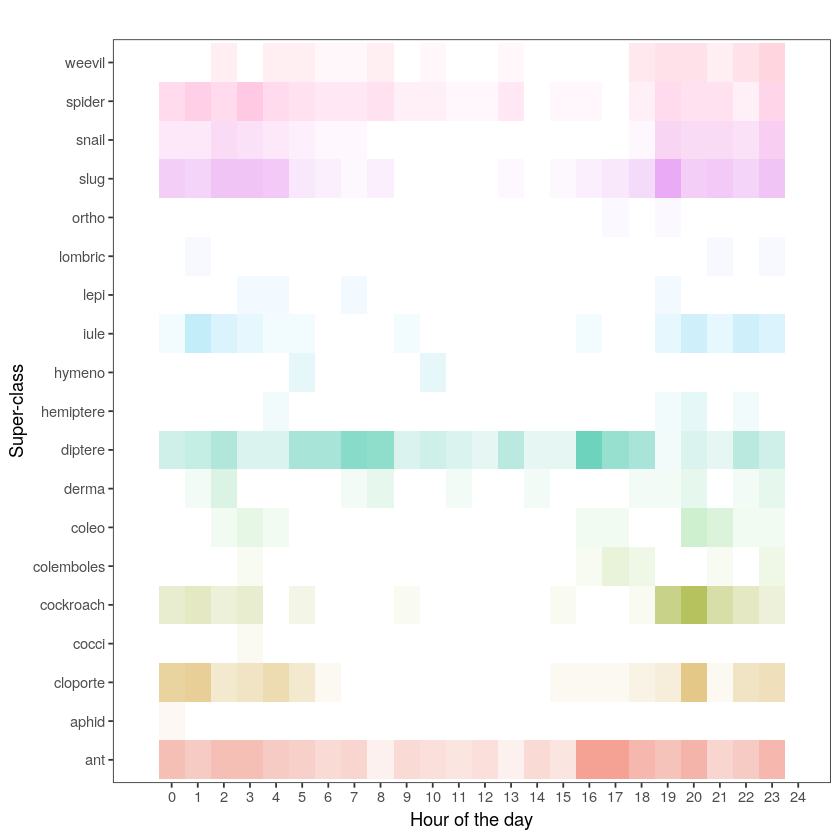

In [15]:
ggplot(df,aes(x=hour, y=obj_class, fill = obj_class))  +
  geom_tile(alpha=0.05) +
  scale_x_continuous(breaks=0:24,limits=c(-1,24)) +
theme_bw()+theme(panel.grid.major = element_blank(),panel.grid.minor = element_blank(),legend.position = "none")+
labs(title="", x ="Hour of the day", y = "Super-class")

# ggsave('time_by_species.png')

# ggplot(df,aes(x=hour, y=obj_class, fill = obj_class))[]

In [16]:
p = ggplot(data,aes(x=hour, y=obj_class, fill = obj_class))  +
  geom_tile(alpha=0.2) +
  scale_x_continuous(breaks=0:24,limits=c(-1,24)) +
theme_bw()+theme(panel.grid.major = element_blank(),panel.grid.minor = element_blank(),legend.position = "none")+
labs(title="", x ="Hour of the day", y = "Super-class")


In [17]:
# small fix to have ggplot data without doing the computations again

brico = layer_data(p,1)

bs = brico%>%
group_by(xmin, group)%>%
summarise(count=n())

bs$group = as.factor(bs$group)

`summarise()` has grouped output by 'xmin'. You can override using the `.groups` argument.



In [18]:
bs$xmin = bs$xmin +0.1

Saving 6.67 x 6.67 in image



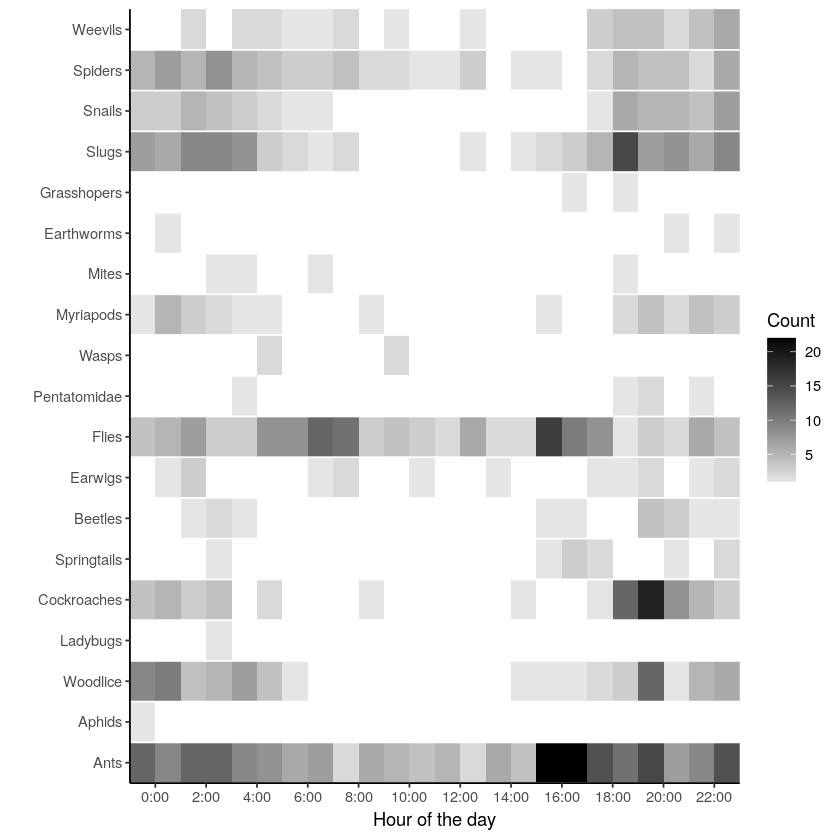

In [19]:
ynames = sort(unique(df$obj_class))
ynames = c('Weevils','Spiders','Snails','Slugs','Grasshopers','Earthworms','Mites','Myriapods','Wasps','Pentatomidae','Flies','Earwigs','Beetles','Springtails','Cockroaches','Ladybugs','Woodlice','Aphids','Ants')
breaks_hours = c(0,2,4,6,8,10,12,14,16,18,20,22)
labels_hours = c('0:00','2:00','4:00','6:00','8:00','10:00','12:00','14:00','16:00','18:00','20:00','22:00')

ggplot(bs,aes(x=xmin, y=group, fill = count))+geom_tile()+
geom_hline(aes(yintercept=as.numeric(group)-0.5), col = 'white')+
scale_fill_continuous(name = 'Count',high = 'black', low='grey90')+
# scale_fill_viridis_c(name = 'Count',option = "plasma")+
scale_x_continuous(expand=c(0,0), breaks = breaks_hours,labels = labels_hours)+
scale_y_discrete(expand=c(0,0), labels=rev(ynames))+
theme_classic()+
# theme(panel.background = element_rect(fill='grey80'))+ylab('')+xlab('Hour of the day')
theme(panel.background = element_rect(fill='white'))+ylab('')+xlab('Hour of the day')

ggsave('figs/time_by_species-b.png')

# Co-occurence

In [ ]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(reshape2)

In [ ]:
data_inter = read.table('data/interactions-simple.csv',h=TRUE,sep=',')
# df with duplicates but easier to plot (just cut the lower half of the matrix)
data_temp = data_inter

data_test1 = data_temp%>%
spread(classB, count)

# data_test1

data_test = data_test1[-1]
row.names(data_test) = data_test1$classA

data_test[is.na(data_test)] <- 10

# data_test

cor_base = data_test
cor_base[lower.tri(cor_base)] <- NA

names = colnames(data_test)

names = names[names!='classA']

names
# cor_base

names = c('Fourmi','Cloporte','Blatte','Colembole','Coléoptère','Dermaptère','Diptère','Hémiptère','Myriapode','Lombric','Puceron','Orthoptère','Limace','Escargot','Araignée','Charançon')


cor_tri <- as.data.frame(cor_base) %>% 
  mutate(classA = factor(row.names(.), levels=row.names(.))) %>% 
  gather(key = classB, value = count, -classA, na.rm = TRUE, factor_key = TRUE) 


ggplot(cor_tri, aes(x= classA, y=classB, fill = count))+
geom_tile(color='black')+
scale_x_discrete(position = "top", labels = names) +
scale_y_discrete(labels = names) +
scale_fill_continuous(name="Coocurrence",high = 'black', low='white',trans = "log",breaks = c(60,600,3600,36000), labels=c('1 min', '10 min', '1 hour','10 hours'))+
theme(
     panel.background = element_rect(fill='#FFFFFFFF'),
      legend.position = c(0.7, 0.3),
     axis.text.x = element_text(angle = -70, vjust = 0, hjust=1))+xlab('')+ylab('')

# ggsave('figs/coocurrence.pdf')

# Cooccurrences ants

In [5]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
data_inter = read.table('data/interactions_ants.csv',h=TRUE,sep=',')
data = read.table('data/data_dates_clean.csv',h=TRUE,sep=',')

In [7]:
sum(data_inter$count)/3600 #all ants cooccurrences with other ant species

[1] 5.95

In [12]:
sum(data[data$obj_class == 'ant',]$duration)/3600 # all ant occurrences

[1] 349.2667

In [13]:
data_inter[data_inter$count != 0,]

spot classA     classB     count
7  1PC4 techno     solenopsis   30 
15 2BM4 solenopsis brachy       60 
22 2PE4 para       tetra      6210 
39 4LP3 para       solenopsis  900 
49 4PE4 para       solenopsis  600 
53 5LP2 solenopsis mono       6000 
55 5LP2 mono       para       4530 
58 5LP3 para       solenopsis 3090

In [2]:
data_inter_tot = read.table('data/interactions_wo_duplicates.csv',h=TRUE,sep=',') # all interactions at class level

In [3]:
data_inter_tot

classA  classB     count
1   lombric hymeno       0  
2   lombric cockroach    0  
3   lombric ant        300  
4   lombric coleo        0  
5   lombric cloporte     0  
6   lombric ortho        0  
7   lombric cocci        0  
8   lombric colemboles   0  
9   lombric spider       0  
10  lombric snail        0  
11  lombric aphid        0  
12  lombric diptere      0  
13  lombric lepi         0  
14  lombric slug        45  
15  lombric weevil       0  
16  lombric mite         0  
17  lombric derma        0  
18  lombric iule         0  
19  lombric hemiptere    0  
20  hymeno  cockroach    0  
21  hymeno  ant          0  
22  hymeno  coleo        0  
23  hymeno  cloporte     0  
24  hymeno  ortho        0  
25  hymeno  cocci        0  
26  hymeno  colemboles   0  
27  hymeno  spider       0  
28  hymeno  snail        0  
29  hymeno  aphid        0  
30  hymeno  diptere      0  
⋮   ⋮       ⋮          ⋮    
161 aphid   iule          0 
162 aphid   hemiptere     0 
163 diptere lepi          0 
164 diptere slug        420 
165 diptere weevil       30 
166 diptere mite          0 
167 diptere derma         0 
168 diptere iule          0 
169 diptere hemiptere     0 
170 lepi    slug          0 
171 lepi    weevil        0 
172 lepi    mite          0 
173 lepi    derma         0 
174 lepi    iule          0 
175 lepi    hemiptere     0 
176 slug    weevil     1830 
177 slug    mite          0 
178 slug    derma       945 
179 slug    iule          0 
180 slug    hemiptere     0 
181 weevil  mite          0 
182 weevil  derma        75 
183 weevil  iule         15 
184 weevil  hemiptere     0 
185 mite    derma         0 
186 mite    iule          0 
187 mite    hemiptere     0 
188 derma   iule          0 
189 derma   hemiptere     0 
190 iule    hemiptere     0

In [11]:
sum(data_inter_tot[data_inter_tot$classA == 'ant',]$count)/3600 + sum(data_inter_tot[data_inter_tot$classB == 'ant',]$count)/3600

[1] 30.70833

## Time ants

### reading and processing time data

In [6]:
data = read.table('data/analyse_clean.csv', h=T, sep = ',')
dates = read.table('data/images_dates.csv', h=T, sep = ',')

In [7]:
head(dates)
head(data)

year month day hour min session spot image_name seconds
1 2020 10    5   19   58  BM2     1BM2 P1760001   47     
2 2020 10    5   19   59  BM2     1BM2 P1760002   17     
3 2020 10    5   19   59  BM2     1BM2 P1760003   47     
4 2020 10    5   20    0  BM2     1BM2 P1760004   17     
5 2020 10    5   20    0  BM2     1BM2 P1760005   47     
6 2020 10    5   20    1  BM2     1BM2 P1760006   17

session image   obj_class species    abundance_max nb_img contact_pseudo
1 1PE4    1840115 ant       solenopsis 2              2     0             
2 1PE4    1840283 ant       solenopsis 1              1     0             
3 1PE4    1840432 cockroach msp1       1              1     0             
4 1PE4    1840459 ant       solenopsis 1              2     0             
5 1PE4    1840463 ant       solenopsis 1              5     0             
6 1PE4    1840641 cockroach msp2       1             50     1             
  contact_egg contact_char predation
1 1           0            1        
2 0           0            0        
3 0           0            0        
4 1           0            1        
5 0           0            1        
6 0           0            0

In [8]:
data$image_name = sub("^", "P", data$image)
data= data%>%
rename(spot=session)
head(data)

spot image   obj_class species    abundance_max nb_img contact_pseudo
1 1PE4 1840115 ant       solenopsis 2              2     0             
2 1PE4 1840283 ant       solenopsis 1              1     0             
3 1PE4 1840432 cockroach msp1       1              1     0             
4 1PE4 1840459 ant       solenopsis 1              2     0             
5 1PE4 1840463 ant       solenopsis 1              5     0             
6 1PE4 1840641 cockroach msp2       1             50     1             
  contact_egg contact_char predation image_name
1 1           0            1         P1840115  
2 0           0            0         P1840283  
3 0           0            0         P1840432  
4 1           0            1         P1840459  
5 0           0            1         P1840463  
6 0           0            0         P1840641

In [9]:
data = inner_join(data,dates)
head(data)

Joining, by = c("spot", "image_name")



spot image   obj_class species    abundance_max nb_img contact_pseudo
1 1PE4 1840115 ant       solenopsis 2              2     0             
2 1PE4 1840283 ant       solenopsis 1              1     0             
3 1PE4 1840432 cockroach msp1       1              1     0             
4 1PE4 1840459 ant       solenopsis 1              2     0             
5 1PE4 1840463 ant       solenopsis 1              5     0             
6 1PE4 1840641 cockroach msp2       1             50     1             
  contact_egg contact_char predation image_name year month day hour min session
1 1           0            1         P1840115   2020 10    26  18   18  PE4    
2 0           0            0         P1840283   2020 10    26  19   42  PE4    
3 0           0            0         P1840432   2020 10    26  20   56  PE4    
4 1           0            1         P1840459   2020 10    26  21   10  PE4    
5 0           0            1         P1840463   2020 10    26  21   12  PE4    
6 0           0            0         P1840641   2020 10    26  22   41  PE4    
  seconds
1  8     
2  8     
3 38     
4  8     
5  8     
6  8

In [10]:
data = data %>%
filter(obj_class == 'ant')%>%
filter(species != 'unclear')%>%
mutate(duration = (nb_img/2)*60)

In [13]:
data=data %>%
  mutate(date = make_datetime(year, month, day, hour, min, seconds))

In [14]:
data = data%>%
mutate(end_date = date + duration)

In [15]:
library(scales)

In [16]:
data$timestamp <- as.POSIXct(strptime(data$date, "%Y-%m-%d %H:%M:%S",  tz = "UTC"))

In [17]:
data$timestamp

  [1] "2020-10-26 18:18:08 UTC" "2020-10-26 19:42:08 UTC"
  [3] "2020-10-26 21:10:08 UTC" "2020-10-26 21:12:08 UTC"
  [5] "2020-10-26 23:19:08 UTC" "2020-10-27 00:18:38 UTC"
  [7] "2020-10-27 00:32:08 UTC" "2020-10-27 00:55:08 UTC"
  [9] "2020-10-27 01:00:08 UTC" "2020-10-27 02:07:08 UTC"
 [11] "2020-10-27 02:23:38 UTC" "2020-10-27 04:35:38 UTC"
 [13] "2020-10-27 05:35:08 UTC" "2020-10-27 06:44:08 UTC"
 [15] "2020-10-27 14:04:38 UTC" "2020-09-17 16:09:52 UTC"
 [17] "2020-09-17 18:09:52 UTC" "2020-09-17 20:53:22 UTC"
 [19] "2020-09-18 07:09:52 UTC" "2020-09-18 11:34:52 UTC"
 [21] "2020-10-06 06:39:47 UTC" "2020-10-06 09:48:17 UTC"
 [23] "2020-10-06 12:13:17 UTC" "2020-10-19 19:29:49 UTC"
 [25] "2020-10-19 20:53:49 UTC" "2020-10-19 22:06:19 UTC"
 [27] "2020-10-20 05:55:48 UTC" "2020-10-20 07:20:18 UTC"
 [29] "2020-11-05 17:14:53 UTC" "2020-11-05 21:45:53 UTC"
 [31] "2020-11-06 00:34:53 UTC" "2020-11-06 04:47:23 UTC"
 [33] "2020-11-23 16:36:13 UTC" "2020-11-23 18:40:13 UTC"
 [35] "2020-11

In [18]:
library(hms)
data$time <- hms::hms(second(data$timestamp), minute(data$timestamp), hour(data$timestamp))
data$time <- as.POSIXct(data$time)
# write.csv(data, 'data_dates_clean.csv',row.names=FALSE)


Attaching package: ‘hms’


The following object is masked from ‘package:lubridate’:

    hms




### Plots

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



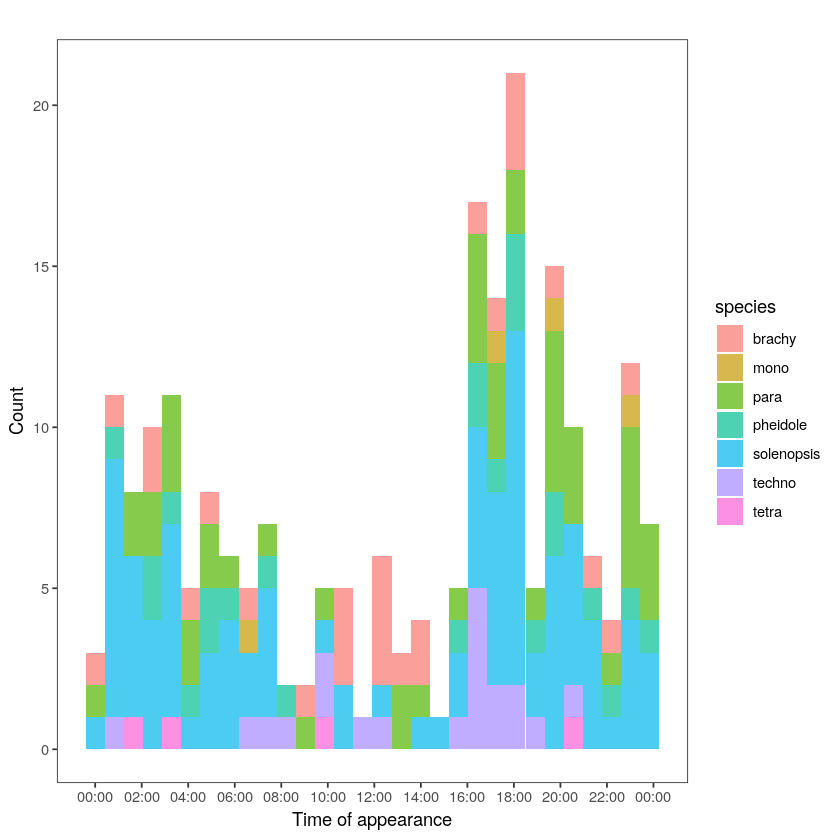

In [19]:
# first visualisation as barplot

ggplot(data, aes(time, fill=species)) + 
  geom_histogram(alpha = 0.7) + #also play with adjust such as adjust = 0.5
  scale_x_datetime(breaks = date_breaks("2 hours"), labels=date_format("%H:%M"))+
theme_bw()+theme(panel.grid.major = element_blank(),panel.grid.minor = element_blank())+
labs(title="", x ="Time of appearance", y = "Count")

# ggsave('time_total.png')

In [20]:
tz = "UTC"

df <- data %>%
  mutate( hour_start = as.numeric(hour(date)),
          hour_end_est = as.numeric(hour(end_date)),
          hour_end = ifelse(hour_end_est >= hour_start, 
                            hour_end_est,
                            hour_start)
  ) 

df

spot image   obj_class species    abundance_max nb_img contact_pseudo
1   1PE4 1840115 ant       solenopsis 2               2    0             
2   1PE4 1840283 ant       solenopsis 1               1    0             
3   1PE4 1840459 ant       solenopsis 1               2    0             
4   1PE4 1840463 ant       solenopsis 1               5    0             
5   1PE4 1840717 ant       solenopsis 1               1    0             
6   1PE4 1840836 ant       brachy     1               1    0             
7   1PE4 1840863 ant       solenopsis 1               2    0             
8   1PE4 1840909 ant       brachy     1               1    0             
9   1PE4 1840919 ant       solenopsis 1               1    0             
10  1PE4 1850054 ant       pheidole   1               1    0             
11  1PE4 1850087 ant       pheidole   1               1    0             
12  1PE4 1850351 ant       pheidole   1               1    0             
13  1PE4 1850470 ant       solenopsis 2              30    1             
14  1PE4 1850608 ant       solenopsis 2             100    1             
15  1PE4 1860490 ant       solenopsis 2             100    1             
16  1BM1 1450081 ant       techno     1              40    1             
17  1BM1 1450321 ant       techno     1             100    1             
18  1BM1 1450648 ant       techno     1             100    1             
19  1BM1 1460882 ant       techno     1             300    0             
20  1BM1 1470413 ant       techno     1             100    1             
21  1BM2 1770284 ant       techno     2               1    0             
22  1BM2 1770661 ant       techno     1             100    1             
23  1BM2 1770951 ant       techno     2             200    1             
24  1BM3 1870823 ant       solenopsis 1               1    0             
25  1BM3 1870991 ant       solenopsis 2              10    0             
26  1BM3 1880137 ant       solenopsis 1             100    1             
27  1BM3 1890077 ant       solenopsis 1              50    1             
28  1BM3 1890246 ant       solenopsis 3             100    1             
29  1BM4 2010112 ant       solenopsis 1             200    1             
30  1BM4 2010654 ant       solenopsis 3             100    1             
⋮   ⋮    ⋮       ⋮         ⋮          ⋮             ⋮      ⋮             
190 5LP3 1760070 ant       pheidole     1              5   0             
191 5LP3 1760214 ant       pheidole     2              2   1             
192 5LP3 1760496 ant       para         1              1   0             
193 5LP3 1760496 ant       solenopsis   1            500   1             
194 5LP3 1760758 ant       para         1              2   0             
195 5LP3 1770018 ant       solenopsis   2           1000   1             
196 5LP3 1770205 ant       para         1            100   0             
197 5LP4 1950631 ant       solenopsis   1              1   0             
198 5LP5 2140152 ant       pheidole     2           1400   0             
199 5PC2 1750160 ant       solenopsis   1            300   1             
200 5PC4 1940869 ant       brachy       1              1   0             
201 5PC4 1950564 ant       solenopsis   1            100   0             
202 5PC5 2110714 ant       brachy       1              1   1             
203 5PC5 2110864 ant       brachy       1            300   1             
204 5PE1 1420966 ant       para         1              1   0             
205 5PE1 1430096 ant       brachy       1            500   0             
206 5PE1 1430822 ant       solenopsis   1              1   0             
207 5PE2 1690004 ant       brachy      20            900   1             
208 5PE2 1700781 ant       brachy       1              2   0             
209 5PE4 1910234 ant       brachy       5           2600   1             
210 5PE5 2070068 ant       solenopsis   1              1   1             
211 5SL1 1550893 ant       solenopsis   1              1   0             
212 5SL1

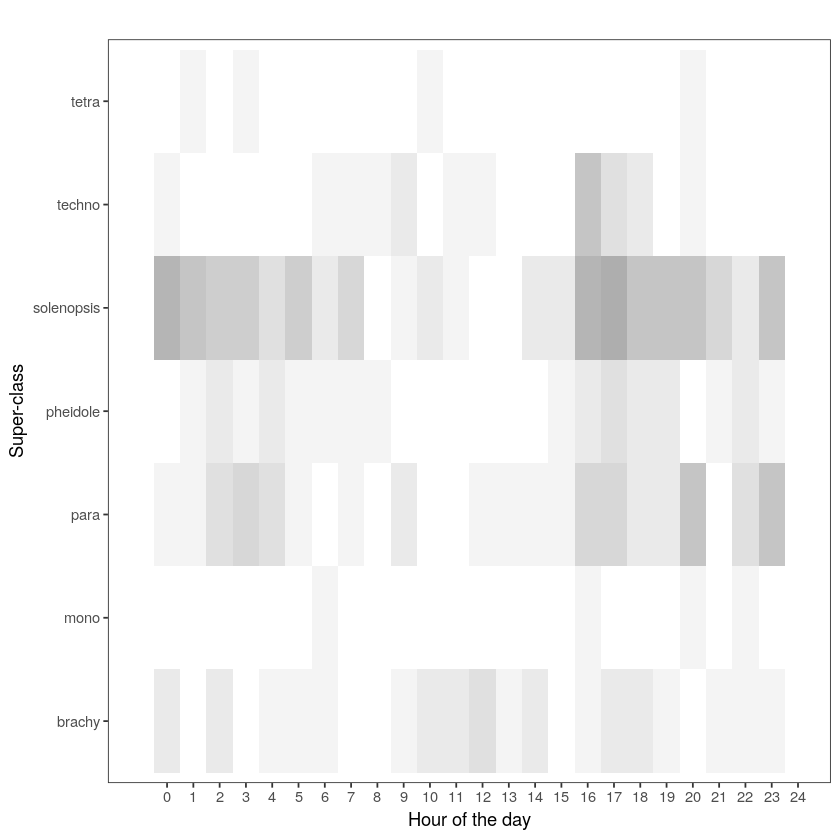

In [21]:
ggplot(df,aes(x=hour, y=species))  +
  geom_tile(alpha=0.05) +
  scale_x_continuous(breaks=0:24,limits=c(-1,24)) +
theme_bw()+theme(panel.grid.major = element_blank(),panel.grid.minor = element_blank(),legend.position = "none")+
labs(title="", x ="Hour of the day", y = "Super-class")

# ggsave('time_by_species.png')

# ggplot(df,aes(x=hour, y=obj_class, fill = obj_class))[]

In [22]:
p = ggplot(data,aes(x=hour, y=species, fill = species))  +
  geom_tile(alpha=0.2) +
  scale_x_continuous(breaks=0:24,limits=c(-1,24)) +
theme_bw()+theme(panel.grid.major = element_blank(),panel.grid.minor = element_blank(),legend.position = "none")+
labs(title="", x ="Hour of the day", y = "Super-class")


In [23]:
# small fix to have ggplot data without doing the computations again

brico = layer_data(p,1)

bs = brico%>%
group_by(xmin, group)%>%
summarise(count=n())

bs$group = as.factor(bs$group)

`summarise()` has grouped output by 'xmin'. You can override using the `.groups` argument.



In [24]:
bs$xmin = bs$xmin +0.1

Saving 6.67 x 6.67 in image



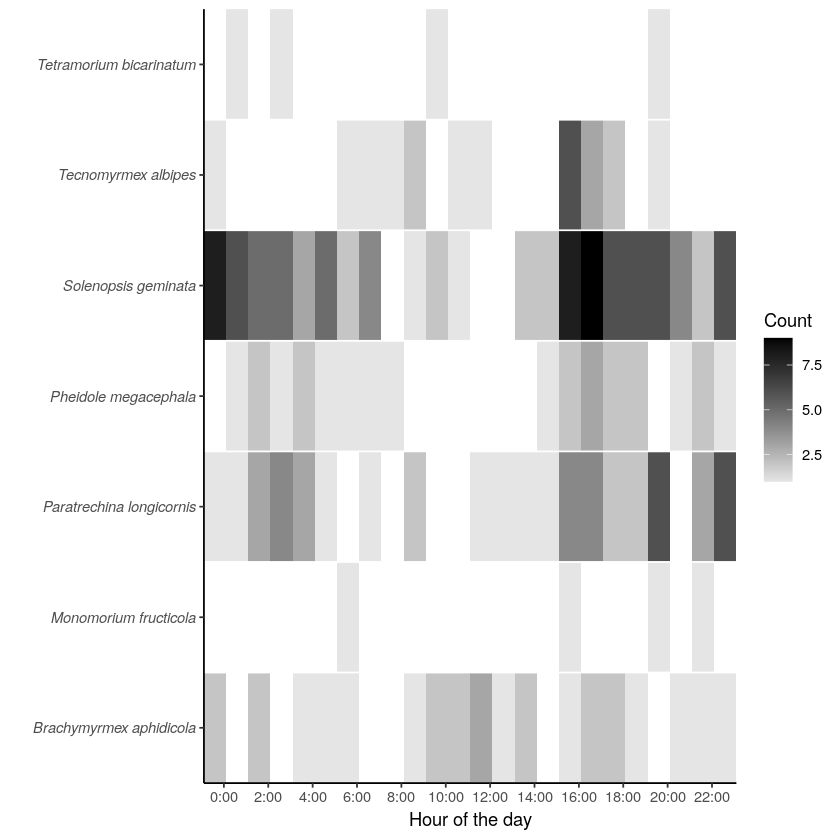

In [31]:
ynames = rev(sort(unique(df$species)))
ynames = c('Tetramorium bicarinatum', 'Tecnomyrmex albipes', 'Solenopsis geminata','Pheidole megacephala', 'Paratrechina longicornis', 'Monomorium fructicola', 'Brachymyrmex aphidicola')
# ynames = c('Weevils','Spiders','Snails','Slugs','Grasshopers','Earthworms','Mites','Myriapods','Wasps','Shield bugs','Flies','Earwigs','Beetles','Springtails','Cockroaches','Ladybugs','Woodlice','Aphids','Ants')
breaks_hours = c(0,2,4,6,8,10,12,14,16,18,20,22)
labels_hours = c('0:00','2:00','4:00','6:00','8:00','10:00','12:00','14:00','16:00','18:00','20:00','22:00')

ggplot(bs,aes(x=xmin, y=group, fill = count))+geom_tile()+
geom_hline(aes(yintercept=as.numeric(group)-0.5), col = 'white')+
scale_fill_continuous(name = 'Count',high = 'black', low='grey90')+
# scale_fill_viridis_c(name = 'Count',option = "plasma")+
scale_x_continuous(expand=c(0,0), breaks = breaks_hours,labels = labels_hours)+
scale_y_discrete(expand=c(0,0), labels=rev(ynames))+
theme_classic()+ theme(axis.text.y = element_text(face = "italic"))+
# theme(panel.background = element_rect(fill='grey80'))+ylab('')+xlab('Hour of the day')
theme(panel.background = element_rect(fill='white'))+ylab('')+xlab('Hour of the day')

ggsave('figs/time_by_ant_species-b.png')